In [1]:
import numpy as np
from sklearn.linear_model import LogisticRegression

In [2]:
X_train = np.r_[np.random.normal(3, 1, size = 50),
          np.random.normal(-1, 1, size = 50)].reshape((100, -1))
y_train = np.r_[np.ones(50), np.zeros(50)]

In [9]:
#confirm contents
X_train[:5]

array([[2.40416147],
       [3.00394529],
       [1.89599244],
       [3.42699527],
       [3.33864548],
       [2.70083171],
       [3.8471614 ],
       [2.29294921],
       [2.21442543],
       [2.20357607]])

In [12]:
#confirm contents
y_train[:5]

array([1., 1., 1., 1., 1.])

In [17]:
model = LogisticRegression()
model.fit(X_train, y_train)
model.predict_proba([[0], [1], [2]])[:, 1]

array([0.07723521, 0.49757938, 0.92137329])

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt

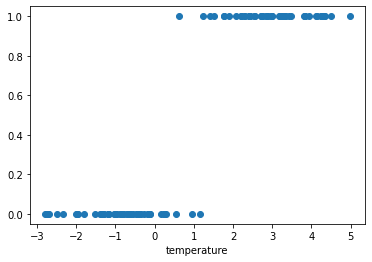

In [22]:
fig, ax = plt.subplots()
ax.set_xlabel("temperature")
ax.scatter(X_train, y_train)
plt.show()

In [36]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [25]:
data = load_iris()
X = pd.DataFrame(data.data, columns = data.feature_names)
y = pd.DataFrame(data.target, columns = ['Species'])
df = pd.concat([X, y], axis = 1)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [28]:
df2 = df[(df['Species'] == 0) | (df['Species'] == 1)]
df2

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1


In [33]:
X = df2.iloc[:, [2, 3]]
y = df2.iloc[:, 4]

In [37]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, random_state = 0)

In [41]:
model2 = LogisticRegression()
model2.fit(X_train2, y_train2)

LogisticRegression()

In [47]:
print(model2.intercept_)
print(model2.coef_)

[-7.3018626]
[[2.41092643 1.01214654]]


In [48]:
w0 = model2.intercept_
w1 = model2.coef_[0, 0]
w2 = model2.coef_[0, 1]

In [49]:
x1 = np.linspace(0, 6, 30)
x2 = (-w1 * x1 - w0) / w2

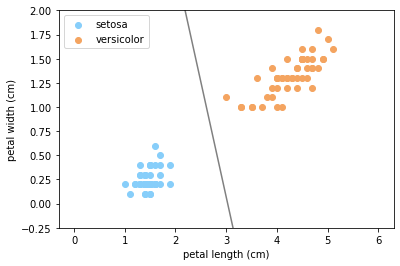

In [52]:
plt.plot(x1, x2, color = 'gray')
plt.scatter(X.iloc[:, 0][y == 0], X.iloc[:, 1][y == 0], color = 'lightskyblue', label = data.target_names[0])
plt.scatter(X.iloc[:, 0][y == 1], X.iloc[:, 1][y == 1], color = 'sandybrown', label = data.target_names[1])
plt.ylim(-0.25, 2)
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.legend()
plt.show()